In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_json("https://pomber.github.io/covid19/timeseries.json")

In [3]:
#taking a look at the structure of data for a specefic country
data["US"].head()

0    {'date': '2020-1-22', 'confirmed': 1, 'deaths'...
1    {'date': '2020-1-23', 'confirmed': 1, 'deaths'...
2    {'date': '2020-1-24', 'confirmed': 2, 'deaths'...
3    {'date': '2020-1-25', 'confirmed': 2, 'deaths'...
4    {'date': '2020-1-26', 'confirmed': 5, 'deaths'...
Name: US, dtype: object

In [4]:
#the objective is to create a table of countries and dates as columns with confirmed cases as values
data_to_use = pd.DataFrame()

In [5]:
#creating a dates column

#making a list of countries
countries = data.columns

dates = []
for x,y in zip(range(0,len(data)),countries):
    date_extracted = data[y][x]["date"]
    dates.append(date_extracted)
data_to_use["date"]=dates

In [6]:

#adding ccountries as columns
for i in countries:
    data_to_use[i] = 0
    data_to_use[i] = data_to_use[i].astype(float)

In [7]:
#updating values of cells to confirmed cases
for country in countries:
    for x in range(0,len(data)):
        data_to_use.at[x,country] = data[country][x]["confirmed"]
    

In [8]:
#previewing results
for i in countries:
    data_to_use[i].astype(float)
data_to_use

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,Burma,MS Zaandam,Botswana,Burundi,Sierra Leone,Malawi
0,2020-1-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-1-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-1-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-1-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-1-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2020-3-29,120.0,212.0,511.0,334.0,7.0,7.0,745.0,424.0,3984.0,...,2.0,18.0,2.0,94.0,10.0,2.0,0.0,0.0,0.0,0.0
68,2020-3-30,170.0,223.0,584.0,370.0,7.0,7.0,820.0,482.0,4361.0,...,8.0,25.0,7.0,94.0,14.0,2.0,3.0,0.0,0.0,0.0
69,2020-3-31,174.0,243.0,716.0,376.0,7.0,7.0,1054.0,532.0,4559.0,...,8.0,28.0,8.0,112.0,15.0,2.0,4.0,2.0,1.0,0.0
70,2020-4-1,237.0,259.0,847.0,390.0,8.0,7.0,1054.0,571.0,4862.0,...,9.0,31.0,8.0,125.0,15.0,9.0,4.0,2.0,2.0,0.0


In [9]:
cases_data_to_use_t = data_to_use.set_index(data_to_use["date"])
cases_data_to_use_t = data_to_use.transpose(copy = True)
cases_data_to_use_t.reset_index()
cases_data_to_use_t.to_csv("cases_data_to_use_t.csv", index_label = False)

In [10]:
#creating a new cases df
new_cases_to_use = data_to_use.copy()

#updating values to new cases
for country in countries:
    for x in range(1,len(data)):
        if data_to_use[country][x-1] != 0:
            new_cases_to_use.at[x,country] = data_to_use[country][x] - data_to_use[country][x-1]
        else: 
            new_cases_to_use.at[x,country] = data_to_use[country][x]
new_cases_to_use["Japan"]

0       2.0
1       0.0
2       0.0
3       0.0
4       2.0
      ...  
67    173.0
68      0.0
69     87.0
70    225.0
71    317.0
Name: Japan, Length: 72, dtype: float64

In [11]:
#creating a growth factor df
growth_data_to_use = new_cases_to_use.copy()

In [12]:
#updating values to growth factor
for country in countries:
    for x in range(1,len(data)):
        if new_cases_to_use[country][x-1] != 0:
            growth_data_to_use.at[x,country] = new_cases_to_use[country][x] / new_cases_to_use[country][x-1]
        else: 
            growth_data_to_use.at[x,country] = new_cases_to_use[country][x]

In [13]:
growth_data_to_use["Bahrain"].tail(10)

62     0.348837
63     1.800000
64     1.444444
65     0.205128
66     1.250000
67     2.300000
68     0.695652
69     3.250000
70     0.038462
71    37.000000
Name: Bahrain, dtype: float64

In [14]:
growth_data_to_use

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,Burma,MS Zaandam,Botswana,Burundi,Sierra Leone,Malawi
0,2020-1-22,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0
1,2020-1-23,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0
2,2020-1-24,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0
3,2020-1-25,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0
4,2020-1-26,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,4.000000,...,0.0,0.000000,0.0,0.000000,0.00,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2020-3-29,10.000000,1.363636,1.266667,0.634146,2.0,0.0,0.544554,0.217949,0.692153,...,0.0,0.000000,0.0,0.600000,2.00,0.0,0.000000,0.0,0.0,0.0
68,2020-3-30,5.000000,0.733333,1.280702,1.384615,0.0,0.0,1.363636,3.411765,1.095930,...,6.0,7.000000,5.0,0.000000,2.00,0.0,3.000000,0.0,0.0,0.0
69,2020-3-31,0.080000,1.818182,1.808219,0.166667,0.0,0.0,3.120000,0.862069,0.525199,...,0.0,0.428571,0.2,18.000000,0.25,0.0,0.333333,2.0,1.0,0.0
70,2020-4-1,15.750000,0.800000,0.992424,2.333333,1.0,0.0,0.000000,0.780000,1.530303,...,1.0,1.000000,0.0,0.722222,0.00,7.0,0.000000,0.0,1.0,0.0


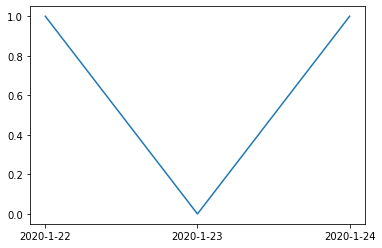

In [15]:
#plotting the data to preview
plt.plot(growth_data_to_use["date"][:3], growth_data_to_use["US"][:3] )

In [16]:
#saving growth as json
growth_data_to_use.to_json("growth.json")
#saving growth as csv
growth_data_to_use.to_csv("growth.csv")

In [17]:
#creating a decision tree for a tabel with an analysis of each country's infection rate
up_country = []
growth_factor = []
cases = []
analysis = []
avg_growth_factor_past_2_days = []
new_cases = []
for country in countries:

        
        if data_to_use[country][len(data)-10] == 0:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("New to The Pandemic") 
        elif data_to_use[country][len(data)-1] < 229 and growth_data_to_use[country][len(data)-1] <= 2 or (new_cases_to_use[country][len(data)-7] ==0 and new_cases_to_use[country][len(data)-3] ==0 and new_cases_to_use[country][len(data)-1] == 0):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread Can Be Contained!")
        elif data_to_use[country][len(data)-1] < 2000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2) <1:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif data_to_use[country][len(data)-1] < 2000 and (growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1.6:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Starting To Get Outta Hands!")
        elif data_to_use[country][len(data)-1] < 3000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2) <1:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif data_to_use[country][len(data)-1] < 3000 and (growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1.6:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Starting To Get Outta Hands!")
        elif data_to_use[country][len(data)-1] > 3000 and ((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2 <1 and new_cases_to_use[country][len(data)-1] <229):
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread is Possibly Getting Under Control!")
        elif (data_to_use[country][len(data)-1] > 3000 and ((growth_data_to_use[country][len(data)-1] >1) or new_cases_to_use[country][len(data)-1] >229)) or new_cases_to_use[country][len(data)-30] >0 and growth_data_to_use[country][len(data)-1]>1.5:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("COVID-19 Spread Has Gotten Out of Control!")
        else:
            up_country.append(country)
            growth_factor.append(growth_data_to_use[country][len(data)-1])
            cases.append(data_to_use[country][len(data)-1])
            avg_growth_factor_past_2_days.append((growth_data_to_use[country][len(data)-1]+growth_data_to_use[country][len(data)-2])/2)
            new_cases.append(new_cases_to_use[country][len(data)-1])
            analysis.append("Analysis is Pending Additional Data")



      
    
growth_chart_df = pd.DataFrame()
growth_chart_df["country"] = up_country
growth_chart_df["growth_factor"]= growth_factor
growth_chart_df["cases"]= cases
growth_chart_df["analysis"]= analysis
growth_chart_df["growth_factor_mod"]= avg_growth_factor_past_2_days
growth_chart_df["new_cases"] = new_cases


In [18]:
#checking the output snapshot, reviewing if the analysis falls in correctly and no rows are missed
growth_chart_df.sort_values(by = "cases")

,country,growth_factor,cases,analysis,growth_factor_mod,new_cases
166,Timor-Leste,0.000000,1.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
116,Papua New Guinea,0.000000,1.0,COVID-19 Spread Can Be Contained!,0.000000,0.0
179,Sierra Leone,0.000000,2.0,New to The Pandemic,0.500000,0.0
127,Saint Vincent and the Grenadines,1.000000,2.0,COVID-19 Spread Can Be Contained!,0.500000,1.0
180,Malawi,3.000000,3.0,New to The Pandemic,1.500000,3.0
...,...,...,...,...,...,...
32,China,0.865854,82432.0,COVID-19 Spread is Possibly Getting Under Cont...,0.939100,71.0
60,Germany,1.141491,84794.0,COVID-19 Spread Has Gotten Out of Control!,1.186630,6922.0
138,Spain,0.969738,112065.0,COVID-19 Spread Has Gotten Out of Control!,0.999178,7947.0
77,Italy,0.976161,115242.0,COVID-19 Spread Has Gotten Out of Control!,1.078014,4668.0


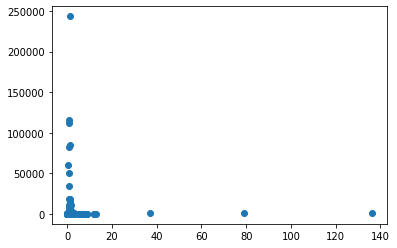

In [19]:
plt.scatter(growth_chart_df["growth_factor"],growth_chart_df["cases"])

In [20]:
growth_chart_df.to_csv("growth_category.csv")